# Live Code 1 (Phase 1)
## Introduction
**Name : Luthfi Fadhlillah**
<br>
**Batch : FTDS 009**



Data are collected from (https://www.kaggle.com/dgawlik/nyse?select=prices-split-adjusted.csv). The assignment is conducted in order to fulfill the Phase 1 project as well as Live Code 1, and aims to implement the Linear Regression in Machine Learning.

## Questions/ Objectives

1. Buatlah model linear regression untuk memprediksi closing price saham Amazon (Dataset URL). Gunakan file prices-split-adjusted.csv dalam kasus ini.

2. Buatlah visualisasi yang menampilkan closing price saham Amazon, Cisco, Apple, dan Netflix berdasarkan date (time series). Saham apa yang memiliki closing price tertinggi dan terendah di akhir tahun 2014, 2015 dan 2016?

3. Buatlah model Logistic Regression untuk memprediksi Loan Pay Back (Dataset URL). Gunakan file loan_data.csv dalam kasus ini.

4. Dengan dataset nomor 3, carilah jumlah fully paid tertinggi dan terendah berdasarkan purpose.

## Import Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score

## Data Loading

In [64]:
data = pd.read_csv('Data_Price_Split.csv')
data

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [66]:
data.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

The dataset doesnt contain any missing values, hence no imputation is required.

In [67]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
open,851264.0,6.499362e+01,7.520389e+01,1.66,3.127000e+01,4.846000e+01,7.512000e+01,1.584440e+03
close,851264.0,6.501191e+01,7.520122e+01,1.59,3.129278e+01,4.848000e+01,7.514000e+01,1.578130e+03
low,851264.0,6.433654e+01,7.445952e+01,1.50,3.094000e+01,4.797000e+01,7.440000e+01,1.549940e+03
high,851264.0,6.563975e+01,7.590686e+01,1.81,3.162000e+01,4.896000e+01,7.585000e+01,1.600930e+03
volume,851264.0,5.415113e+06,1.249468e+07,0.00,1.221500e+06,2.476250e+06,5.222500e+06,8.596434e+08


In [68]:
data.duplicated().sum()

0

In [69]:
data.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

## EDA

In [70]:
data.shape

(851264, 7)

In [71]:
data.dtypes

date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object

In [72]:
data['symbol']

0         WLTW
1         WLTW
2         WLTW
3         WLTW
4         WLTW
          ... 
851259     ZBH
851260    ZION
851261     ZTS
851262     AIV
851263     FTV
Name: symbol, Length: 851264, dtype: object

In [73]:
data['volume']

0         2163600.0
1         2386400.0
2         2489500.0
3         2006300.0
4         1408600.0
            ...    
851259     973800.0
851260    1938100.0
851261    1701200.0
851262    1380900.0
851263     705100.0
Name: volume, Length: 851264, dtype: float64

In [74]:
data['open']

0         123.430000
1         125.239998
2         116.379997
3         115.480003
4         117.010002
             ...    
851259    103.309998
851260     43.070000
851261     53.639999
851262     44.730000
851263     54.200001
Name: open, Length: 851264, dtype: float64

In [75]:
data['close']

0         125.839996
1         119.980003
2         114.949997
3         116.620003
4         114.970001
             ...    
851259    103.199997
851260     43.040001
851261     53.529999
851262     45.450001
851263     53.630001
Name: close, Length: 851264, dtype: float64

In [76]:
data['high']

0         126.250000
1         125.540001
2         119.739998
3         117.440002
4         117.330002
             ...    
851259    103.930000
851260     43.310001
851261     53.740002
851262     45.590000
851263     54.480000
Name: high, Length: 851264, dtype: float64

In [77]:
data['low']

0         122.309998
1         119.940002
2         114.930000
3         113.500000
4         114.089996
             ...    
851259    102.849998
851260     42.689999
851261     53.270000
851262     44.410000
851263     53.389999
Name: low, Length: 851264, dtype: float64

In [78]:
data.date.unique()

array(['2016-01-05', '2016-01-06', '2016-01-07', ..., '2015-12-30',
       '2015-12-31', '2016-01-04'], dtype=object)

## Data Preprocessing

In [79]:
data_amazon = data[data['symbol']=='AMZN']
print(data_amazon.shape)
data_amazon.head()

(1762, 7)


,date,symbol,open,close,low,high,volume
284,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
751,2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
1219,2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0
1687,2010-01-07,AMZN,132.009995,130.000000,128.800003,132.320007,11030200.0
2155,2010-01-08,AMZN,130.559998,133.520004,129.029999,133.679993,9830500.0


In [80]:
data_cisco = data[data['symbol']=='CSCO']
data_cisco.head()

,date,symbol,open,close,low,high,volume
356,2010-01-04,CSCO,24.110001,24.690001,24.010000,24.840000,59853700.0
824,2010-01-05,CSCO,24.600000,24.580000,24.379999,24.730000,45124500.0
1292,2010-01-06,CSCO,24.540001,24.420000,24.340000,24.740000,35715700.0
1760,2010-01-07,CSCO,24.299999,24.530001,24.170000,24.570000,31531200.0
2228,2010-01-08,CSCO,24.379999,24.660000,24.250000,24.700001,39115900.0


In [81]:
data_apple = data[data['symbol']=='AAPL']
data_apple.head()

,date,symbol,open,close,low,high,volume
254,2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400.0
721,2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200.0
1189,2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000.0
1657,2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,119282800.0
2125,2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,111902700.0


In [82]:
data_netflix = data[data['symbol']=='NFLX']
data_netflix.head()

,date,symbol,open,close,low,high,volume
555,2010-01-04,NFLX,7.931428,7.640000,7.565714,7.961429,17239600.0
1023,2010-01-05,NFLX,7.652857,7.358572,7.258572,7.657143,23753100.0
1491,2010-01-06,NFLX,7.361429,7.617143,7.197143,7.672857,23290400.0
1959,2010-01-07,NFLX,7.731429,7.485714,7.462857,7.757143,9955400.0
2427,2010-01-08,NFLX,7.498571,7.614286,7.465714,7.742857,8180900.0


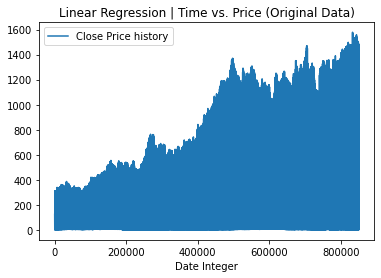

In [83]:
plt.plot(data['close'], label='Close Price history')
plt.title('Linear Regression | Time vs. Price (Original Data)')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

In [84]:
num = data._get_numeric_data()
num

,open,close,low,high,volume
0,123.430000,125.839996,122.309998,126.250000,2163600.0
1,125.239998,119.980003,119.940002,125.540001,2386400.0
2,116.379997,114.949997,114.930000,119.739998,2489500.0
3,115.480003,116.620003,113.500000,117.440002,2006300.0
4,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...
851259,103.309998,103.199997,102.849998,103.930000,973800.0
851260,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,44.730000,45.450001,44.410000,45.590000,1380900.0


In [85]:
for i, j in num.items():
        q1 = j.quantile(0.25)
        q3 = j.quantile(0.75)
        iqr = q3 - q1
        j_col = j[(j <= q1 - 1.5 * iqr) | (j >= q3 + 1.5 * iqr)]
        perc = np.shape(j_col)[0] * 100.0 / np.shape(num)[0]
        print("Column %s outliers = %.2f%%" % (i, perc))

Column open outliers = 6.06%
Column close outliers = 6.06%
Column low outliers = 6.05%
Column high outliers = 6.06%
Column volume outliers = 9.69%


## Split Data


In [86]:
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [87]:
x = data.loc[:,['symbol', 'open', 'low', 'high', 'volume']]
y = data['close'] 

In [88]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [89]:
x_train.shape

(681011, 5)

In [90]:
y_train.shape

(681011,)

### Handling Outliers

#### Handling Outliers Train Data

In [91]:
num_train = x_train._get_numeric_data()
for i, j in num_train.items():
        q1 = j.quantile(0.25)
        q3 = j.quantile(0.75)
        iqr = q3 - q1
        j_col = j[(j <= q1 - 1.5 * iqr) | (j >= q3 + 1.5 * iqr)]
        perc = np.shape(j_col)[0] * 100.0 / np.shape(num_train)[0]
        print("Column %s outliers = %.2f%%" % (i, perc))

Column open outliers = 6.05%
Column low outliers = 6.04%
Column high outliers = 6.05%
Column volume outliers = 9.67%


#### Check Distribution for Train Data

In [92]:
# Fungsi untuk membuat histogram, plot Q-Q dan boxplot.
# Fungsi ini menggunakan kerangka data (data) dan variabel yang diinginkan sebagai argumen.

def diagnostic_plots(x_train, variable):
    # Tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(x_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=x_train[variable])
    plt.title('Boxplot')

    plt.show()

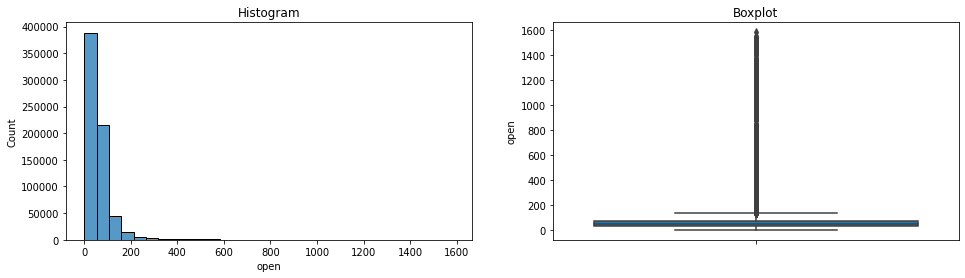


Skewness Value :  7.218724410378506


In [93]:
diagnostic_plots(x_train, 'open')
print('\nSkewness Value : ', x_train['open'].skew())

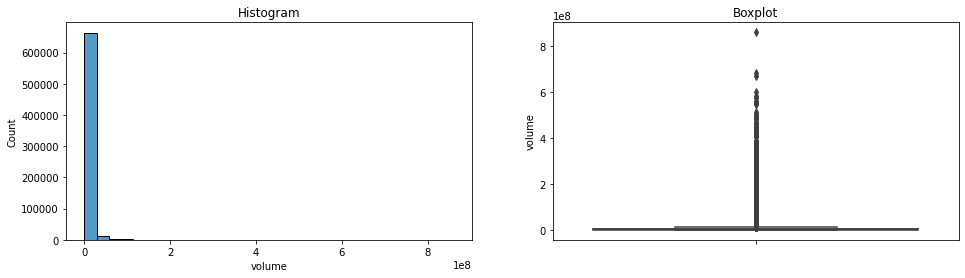


Skewness Value :  13.086470902273424


In [94]:
diagnostic_plots(x_train, 'volume')
print('\nSkewness Value : ', x_train['volume'].skew())

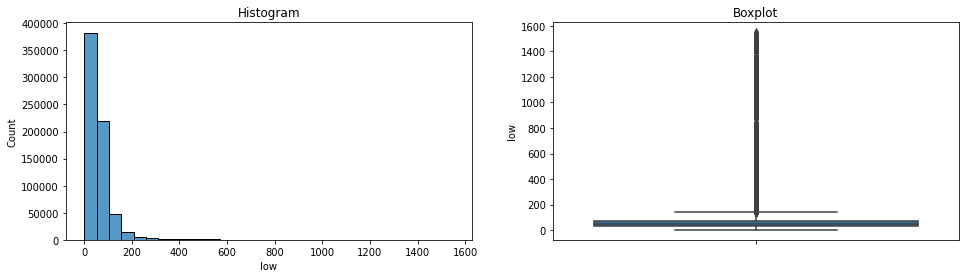


Skewness Value :  7.219348534971379


In [95]:
diagnostic_plots(x_train, 'low')
print('\nSkewness Value : ', x_train['low'].skew())

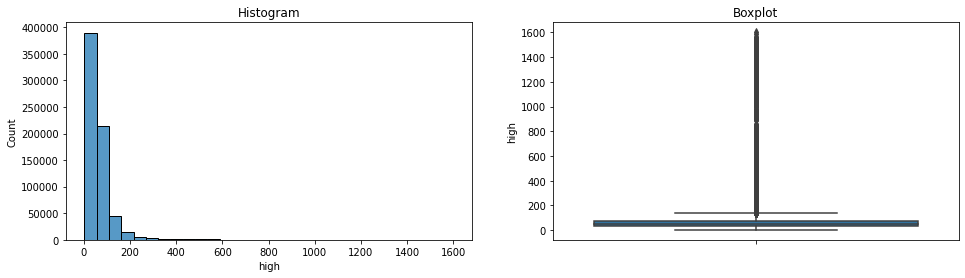


Skewness Value :  7.214582460551979


In [96]:
diagnostic_plots(x_train, 'high')
print('\nSkewness Value : ', x_train['high'].skew())

#### Capping for Train  Data

In [97]:
windsoriser = Winsorizer(capping_method='iqr', # pilih iqr untuk batas aturan IQR atau gaussian untuk mean dan std
                          tail='both', 
                          fold=1.5,
                          variables=['low','high'])

windsoriser.fit(x_train)

x_train = windsoriser.transform(x_train)

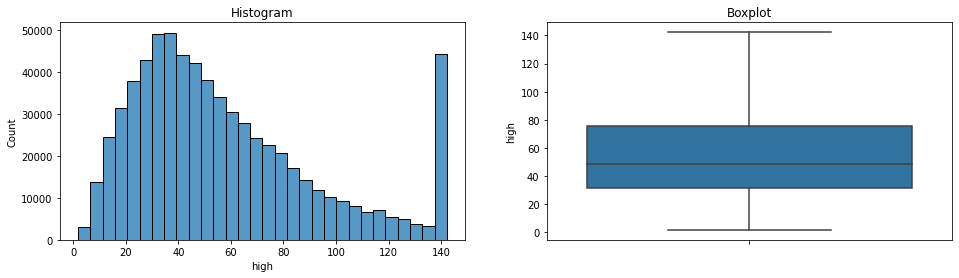


Skewness Value :  0.9430220752782298


In [98]:
diagnostic_plots(x_train, 'high')
print('\nSkewness Value : ', x_train['high'].skew())

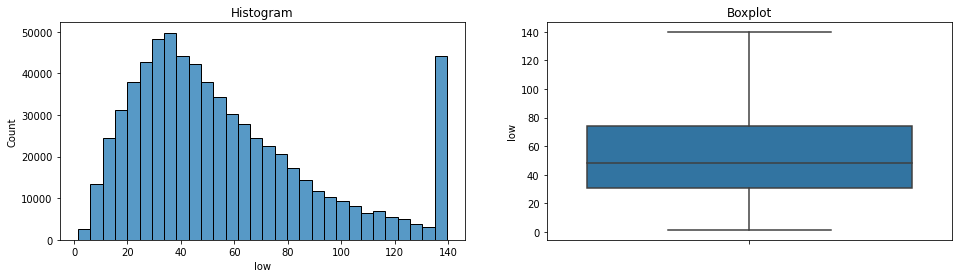


Skewness Value :  0.9426314206541155


In [99]:
diagnostic_plots(x_train, 'low')
print('\nSkewness Value : ', x_train['low'].skew())

### Handling Missing Values
---


In [100]:
y_train.isnull().sum()

0

In [101]:
missing_train = y_train.isnull().index[y_train.isnull()]
missing_test = y_train.isnull().index[y_train.isnull()]

drop_x_train = x_train.drop(missing_train.tolist())
drop_x_train

,symbol,open,low,high,volume
406152,BBY,27.020000,26.820000,27.709999,4857500.0
174444,DISCA,20.291262,20.291262,20.802248,4249400.0
458696,PKI,37.290001,36.799999,37.529999,754200.0
482048,GLW,18.410000,18.370001,18.610001,8110300.0
26531,CB,53.240002,52.650002,53.240002,1706000.0
...,...,...,...,...,...
491263,COG,38.360001,38.040001,39.169998,9862000.0
791624,PHM,20.510000,20.309999,20.650000,2159300.0
470924,PAYX,42.919998,42.570000,43.070000,3086600.0
491755,COL,77.769997,77.489998,78.529999,723400.0


### Feature Encoding

### Feature Scaling

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Modeling

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

## Model Evaluation

In [ ]:
prediction_train = model.predict(x_train)
prediction_train

In [ ]:
prediction_test = model.predict(x_test)
prediction_test

In [ ]:
# Prediksi dari x_train
from sklearn import metrics
print('MAE Train :'," ", metrics.mean_absolute_error(y_train,prediction_train))
print('MSE Train :'," ", metrics.mean_squared_error(y_train,prediction_train))
print('RMAE Train :'," ", np.sqrt(metrics.mean_squared_error(y_train,prediction_train)))
print('MAPE Train :'," ", metrics.mean_absolute_percentage_error(y_train,prediction_train)*100) # Lower the MAPE, better fit is the model.
print('R2 Score Train :'," ", metrics.r2_score(y_train,prediction_train))

# NOMOR 3 & 4

3. Buatlah model Logistic Regression untuk memprediksi Loan Pay Back (Dataset URL). Gunakan file loan_data.csv dalam kasus ini.

4. Dengan dataset nomor 3, carilah jumlah fully paid tertinggi dan terendah berdasarkan purpose.

In [ ]:
data_loan = pd.read_csv('loan_data.csv')
data_loan

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


## EDA

In [115]:
data_loan.shape

(9578, 14)

In [116]:
data_loan.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

## Split data

In [129]:
x_train_loan, x_test_loan, y_train_loan,y_test_loan = train_test_split(x,y, test_size = 0.2, random_state = 1)